In [23]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

nRowsRead = 2000 # specify 'None' if want to read whole file
# animes.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('../anime.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = '../anime.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2000 rows and 7 columns


In [24]:
df1.head(500)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
495,30831,Kono Subarashii Sekai ni Shukufuku wo!,"Adventure, Comedy, Fantasy, Supernatural",TV,10,8.03,244877
496,416,Kurenai no Buta,"Action, Adventure, Comedy, Drama, Historical, ...",Movie,1,8.03,74028
497,85,Mobile Suit Zeta Gundam,"Drama, Mecha, Military, Sci-Fi, Space",TV,50,8.03,28959
498,30240,Prison School,"Comedy, Ecchi, Romance, School, Seinen",TV,12,8.03,227734


In [25]:
# Define a function that takes a pandas DataFrame, the number of graphs to show,
# and the number of graphs to display per row.
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    # Count the number of unique values in each column of the DataFrame.
    nunique = df.nunique()
    # Filter the DataFrame to include only columns with 1-50 unique values.
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    # Get the number of rows and columns in the filtered DataFrame.
    nRow, nCol = df.shape
    # Get a list of column names in the filtered DataFrame.
    columnNames = list(df)
    # Calculate the number of rows needed to display all the graphs.
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    # Create a new matplotlib figure with a size that depends on the number of graphs per row and the number of rows needed.
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    # Loop over the first nGraphShown columns in the DataFrame.
    for i in range(min(nCol, nGraphShown)):
        # Print some information about the current iteration.
        print(nGraphRow, nGraphShown, i+1)
        # Create a new subplot for the current column.
        plt.subplot(int(nGraphRow), nGraphPerRow, i + 1)
        # Get a pandas series containing the values in the current column.
        columnDf = df.iloc[:, i]
        # If the column contains non-numeric values, create a bar plot of value counts.
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        # If the column contains numeric values, create a histogram.
        else:
            columnDf.hist()
        # Set the y-axis label to 'Total'.
        plt.ylabel('Total')
        # Rotate the x-axis labels 90 degrees for better readability.
        plt.xticks(rotation = 90)
        # Set the title of the subplot to the name of the current column and its position in the DataFrame.
        plt.title(f'{columnNames[i]} (column {i})')
    # Make sure the subplots are spaced evenly.
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    # Display the resulting grid of plots.
    plt.show()

1.0 10 1


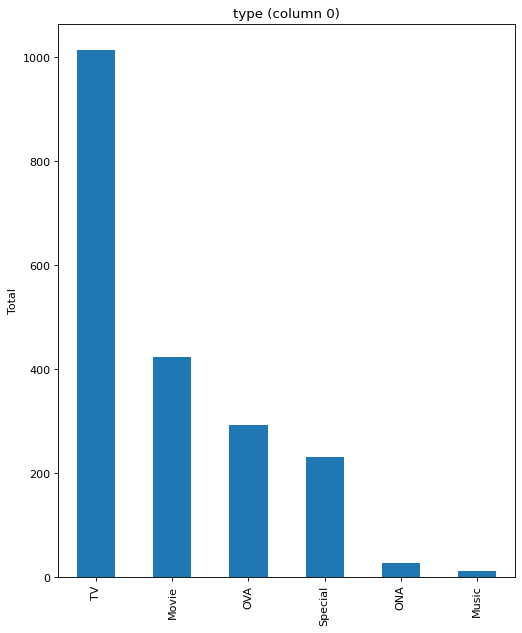

In [26]:
plotPerColumnDistribution(df1, 10, 5)

C:\Users\Roxas\AppData\Local\Temp\ipykernel_14700\4282110752.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
C:\Users\Roxas\AppData\Local\Temp\ipykernel_14700\4282110752.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


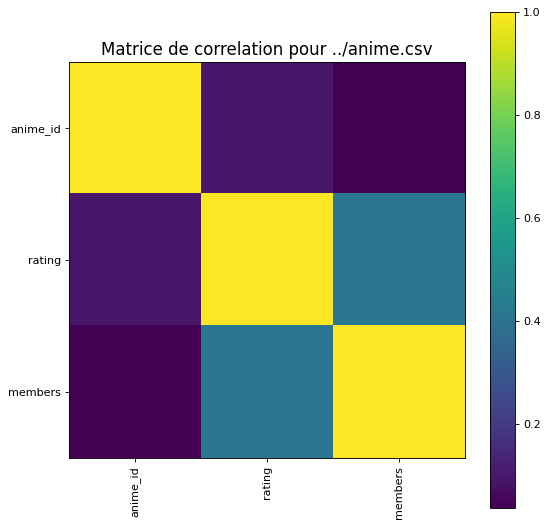

In [27]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Matrice de correlation pour {filename}', fontsize=15)
    plt.show()

plotCorrelationMatrix(df1, 8)

C:\Users\Roxas\AppData\Local\Temp\ipykernel_14700\4121548816.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


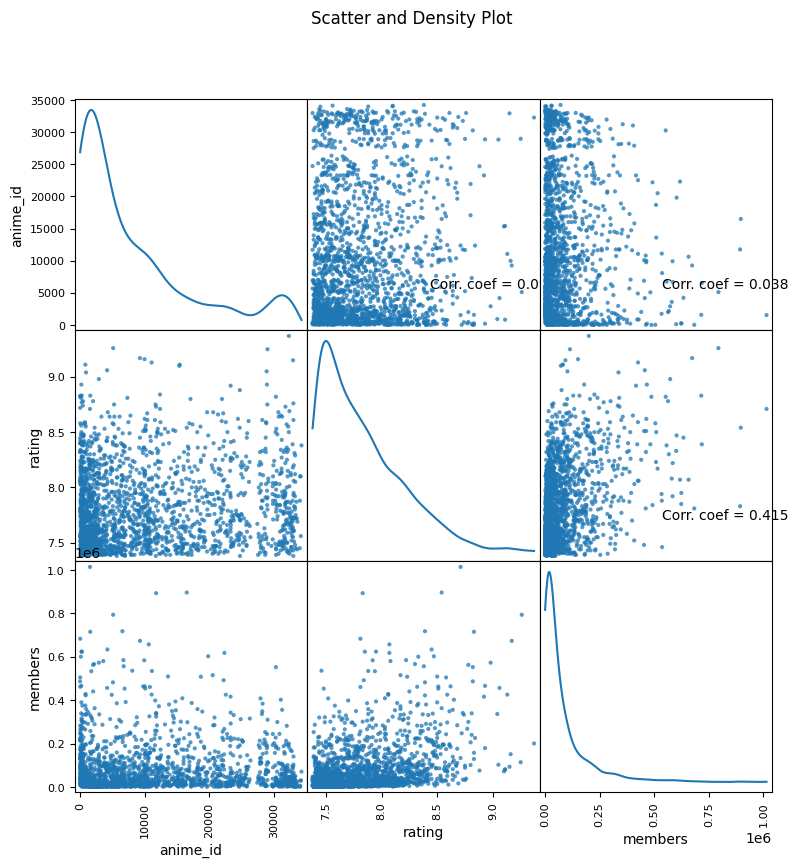

In [28]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(df1, 9, 10)

# RATING.CSV

In [29]:
nRowsRead = 2000 # specify 'None' if want to read whole file
# rating.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('../rating.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'rating.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

df2.head(5)

There are 2000 rows and 3 columns


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


1.2 10 1
1.2 10 2


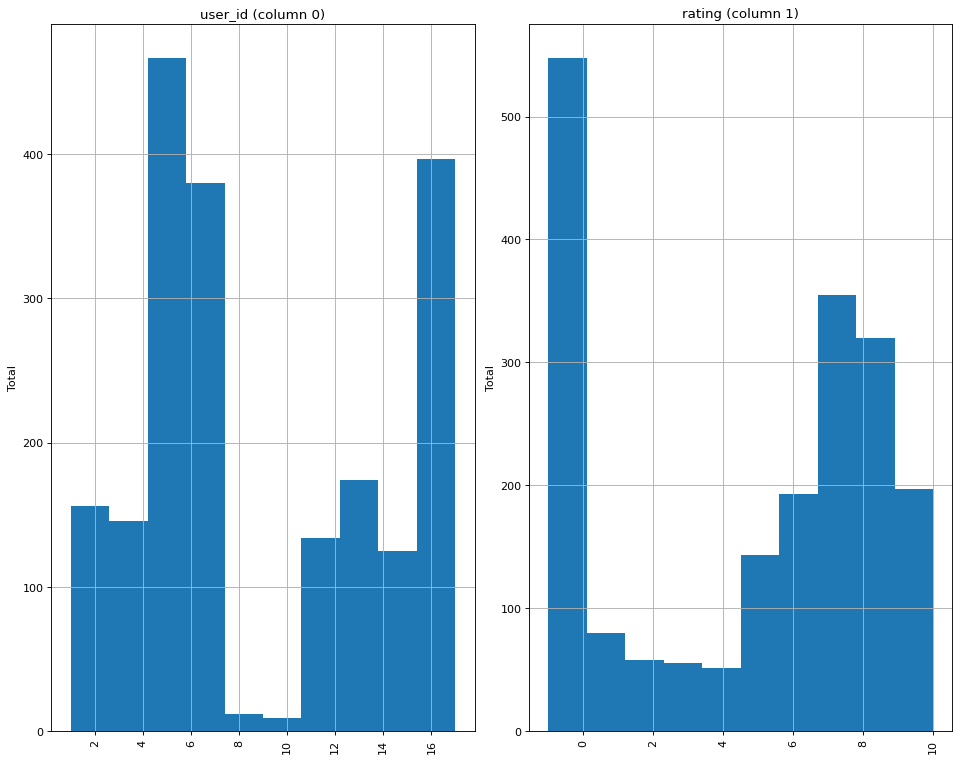

In [30]:
plotPerColumnDistribution(df2, 10, 5)

C:\Users\Roxas\AppData\Local\Temp\ipykernel_14700\4282110752.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


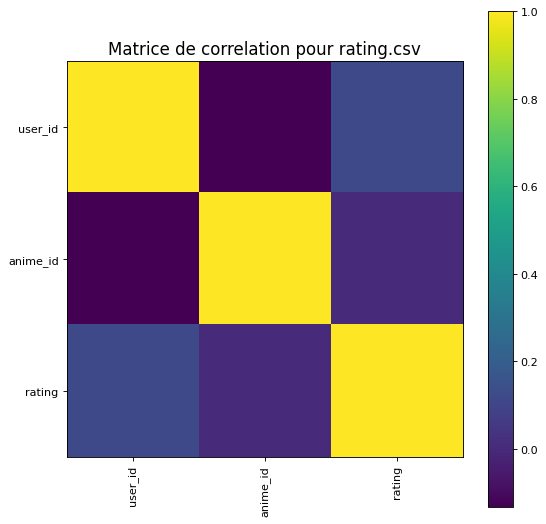

In [31]:
plotCorrelationMatrix(df2, 8)

C:\Users\Roxas\AppData\Local\Temp\ipykernel_14700\4121548816.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


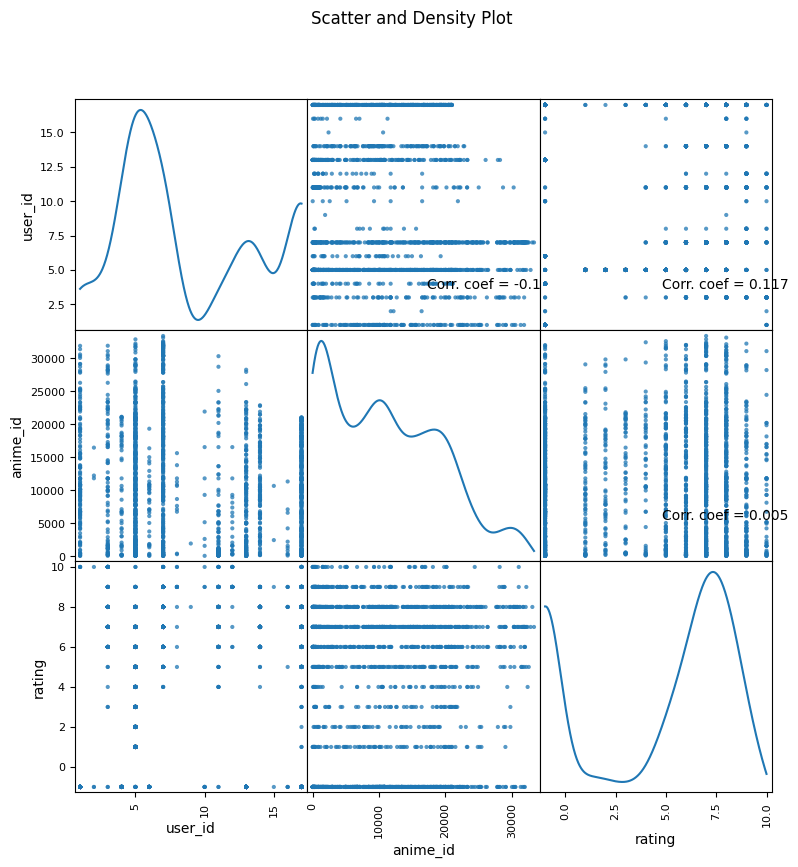

In [21]:
plotScatterMatrix(df2, 9, 10)